# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Оконечников Филипп. Вариант №19

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
МНК

$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min_\beta$

Несмещённая оценка дисперсии:

$S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\hat{\beta})}{n-r}$

Элемент дисперсии оценки: $\beta_{\psi}=C^{\intercal}(XX^{\intercal})^{-1}C$

Доверительный интервал уровня доверия $1-\alpha: [ \hat{\psi} - X_{\alpha}S\sqrt{b};\hat{\psi} + X_{\alpha}S\sqrt{b} ], где X_{\alpha}: {S}_{n-r}(X_{\alpha})=1-\frac{\alpha}{2}$

Критерий хи квадрат.  
$ \chi^2 = \displaystyle\sum_{i=1}^{N} \frac{(n_{i} - np_{i})^{2}}{n p_{i}} \sim \chi^{2}_{n-1}$


## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y
 от переменной X. Полученные результаты содержательно проинтерпретировать.

##Выполнение работы



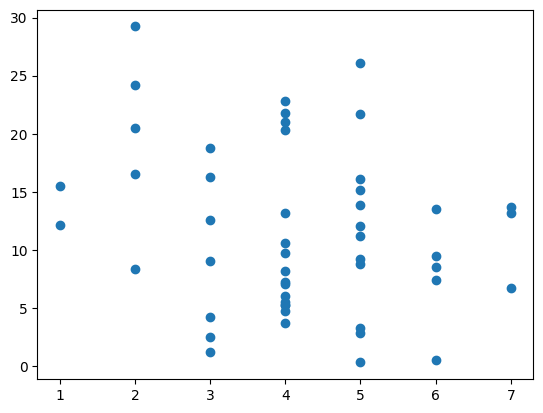

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sst

x = np.array([2, 5, 7, 5, 6, 4, 5, 4, 6, 6, 4, 4, 4, 4, 3, 3, 4, 7, 4, 2, 4, 4, 2, 5, 6, 5, 7, 4, 5, 2, 5, 4, 6, 3, 5, 5, 3, 5, 4, 4, 5, 1, 4, 5, 3, 1, 2, 4, 3, 3]).reshape(-1,1)
y = np.array([20.47, 15.19, 13.17, 26.06, 9.51, 7.10, 12.04, 5.48, 8.56, 13.52, 20.29, 5.30, 5.26, 21.76, 18.79, 9.03, 6.06, 6.71, 4.78, 8.34, 22.80, 8.21, 29.23,
     9.21, 0.55, 0.31, 13.67, 7.27, 16.09, 24.23, 13.85, 21.01, 7.37, 12.56, 8.75, 3.28, 1.17, 21.73, 3.67, 13.15, 11.23, 15.46, 9.71, 2.89, 2.53, 12.15,
     16.50, 10.63, 16.29, 4.21]).reshape(-1,1)
plt.scatter(x,y)

In [ ]:
lr = LinearRegression()
lr.fit(x, y)
display(lr.coef_)
lr.intercept_

array([[-1.13892913]])

array([16.28054517])

In [ ]:
x = np.concatenate([x, np.ones(x.shape)], axis=1)
solve = np.linalg.inv(np.dot(x.T, x)) @ x.T @ y
print(solve)

[[-1.13892913]
 [16.28054517]]


Коэфициенты совпали<br><br>
$\beta_{1} = -1.139$<br>
$\beta_{0} = 16.281$

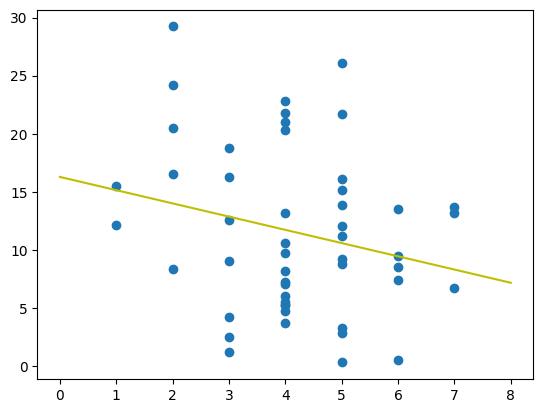

In [ ]:
k, b = solve[0][0], solve[1][0]
plt.scatter(x[:, 0], y)
tmp_x = np.linspace(np.min(x) - 1, np.max(x) + 1, 100)
plt.plot(tmp_x, k * tmp_x + b, 'y')

Результаты статистического эксперимента не расположены на одной прямой

### #2 Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$(3). Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$(0.02) по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

C:\Users\79062\AppData\Local\Temp\ipykernel_17328\1994838006.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bins = np.arange(min(mist), max(mist) + h, h)


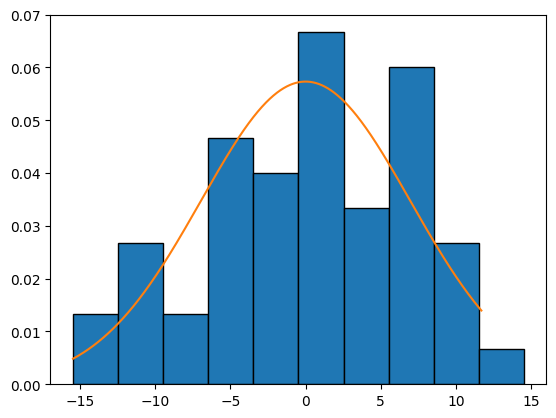

'Несмещенная оценка дисперсии равна: 48.42449025425105'

In [ ]:
mist = lr.predict(x[:, [0]]) - y
S2 = np.sum((mist) ** 2) / (x.shape[0] - np.linalg.matrix_rank(x))
h = 3
bins = np.arange(min(mist), max(mist) + h, h)
plt.hist(mist, bins=bins, density=True, edgecolor='black')
hist, _ = np.histogram(mist, bins=bins)

tmp_x = np.linspace(min(mist), max(mist), 1000)
plt.plot(tmp_x, sst.norm(0, S2 ** 0.5).pdf(tmp_x))
plt.show()
f'Несмещенная оценка дисперсии равна: {S2}'

In [ ]:
intervals = [[bins[i] + 1e-5 * (i != 0), bins[i + 1]] for i in range(len(bins) - 1)]
g = lambda x: np.sum((mist >= x[0]) & (mist <= x[1]))
frq_exp = np.array([g(i) for i in intervals]) / len(mist)
N = sst.norm(0, S2)
frq_norm = np.array([abs(N.pdf(i[1]) - N.pdf(i[0])) * len(mist) for i in intervals])
chi_square = np.sum((frq_exp - frq_norm) ** 2 / frq_norm)
print(f'chi^2: {chi_square}')
alph = 0.02
print(f'x_alph: {sst.chi2.ppf(1 - alph, df=len(frq_norm) - 1)}')

chi^2: 110.08329614574643
x_alph: 19.679016094854546


$\chi^2 > x_{\alpha}$ следовательно нет оснований принять гипотезу о нормальности ошибок

In [ ]:
mist_tmp = mist.reshape(-1)
emp_func = pd.Series(mist_tmp).apply(lambda x: sum(mist_tmp < x)) / mist_tmp.shape[0]
emp_func.index = mist_tmp
Dn = np.max(np.abs(N.pdf(mist_tmp) - emp_func))
C = sst.kstwobign.ppf(1 - alph) / np.sqrt(len(x))
print(f'Dn = {Dn},\nC = {C}')

Dn = 0.9719983024634968,
C = 0.21459657932932177


$D_n > С \implies$ нет оснований принять гипотезу

### #3 В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$(0.98) для $(\beta_0, \beta_1)$ (вычислить его полуоси).

In [ ]:
r = np.linalg.matrix_rank(x)
n = x.shape[0]
x_alpha = sst.t.ppf(1 - alph/2, df = n - r)
C = np.matrix([[1], [0]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"x_alpha = {x_alpha}" )
print(f"left = {solve[0][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[0][0] + x_alpha * (S2 * psi) ** 0.5}")

x_alpha = 2.4065812732756067
left = -2.791292488552017
right = 0.513434233100295


$[-2.791, 0.513] \ni \beta_{0}$

In [ ]:
C = np.matrix([[0], [1]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"left = {solve[1][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[1][0] + x_alpha * (S2 * psi) ** 0.5}")

left = 9.010146383704479
right = 23.55094395897465


$[9.01, 23.551] \ni \beta_{1}$

In [ ]:
C = np.array([[1, 0],
              [0, 1]
              ])
B = C.T @ np.linalg.inv(x.T @ x) @ C
B_inv = np.linalg.inv(B)
q = len(solve)
x_alpha = sst.f.ppf(1-alph, dfn=q, dfd=n - r)
cov = B_inv
eigenvalues, _ = np.linalg.eig(cov)
np.sqrt(1 / eigenvalues * (x_alpha * q * S2))

array([0.63737724, 9.0087241 ])

Первая полуось $\approx$ 0.6373<br>
Вторая полуось $\approx$ 9.0087

### #4 Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

Основная гипотеза: $H_0 : \psi = 0$

In [ ]:
beta_1_h = np.mean(y)
beta_0_h = 0
SSH = np.sum((beta_1_h - y) ** 2) - S2 * (x.shape[0] - np.linalg.matrix_rank(x))

F_stat = (SSH / q) / (S2)
print(f"F-Статистика = {F_stat}")
print(f"x_alpha = {sst.f.ppf(1 - alph, dfn=q, dfd=n - r)}")

F-Статистика = -97.3707200439067
x_alpha = 4.248907630769176


$\mathbb{F} < x_{\alpha}$ => Нет оснований отвергнуть гипотезу о независимости

### #5 Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

In [ ]:
x = np.concatenate([(x[:, 0] ** 2).reshape(-1, 1), x], axis=1)
lr = LinearRegression()
lr.fit(x, y)
display(lr.coef_)
lr.intercept_

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
solve = np.linalg.inv(np.dot(x.T, x)) @ x.T @ y
solve

array([[ 0.34438792],
       [-3.94552972],
       [21.28865357]])

$\beta_{2} = 0.344$<br>
$\beta_{1} = -3.946$<br>
$\beta_{0} = 21.289$

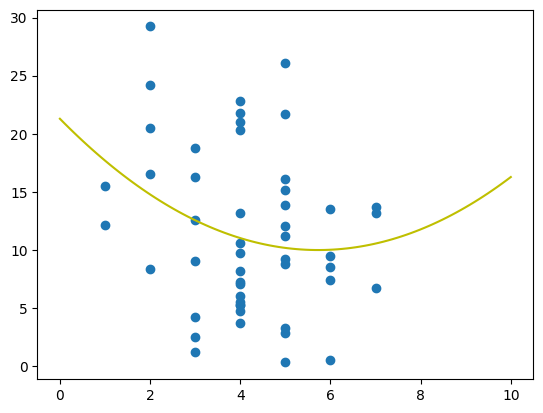

In [ ]:
tmp_x = np.array([[i ** 2, i, 1] for i in np.linspace(0, 10, 100)])
plt.scatter(x[:, 1], y)
plt.plot(tmp_x[:, 1], tmp_x @ solve, 'y')

### #6 Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

C:\Users\79062\AppData\Local\Temp\ipykernel_15520\3334962931.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bins = np.arange(min(mist), max(mist) + h, h)


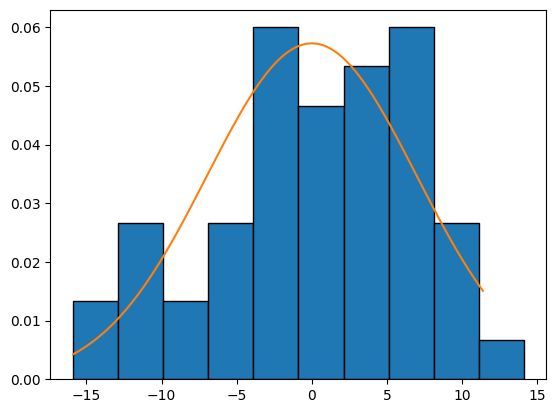

'Несмещенная оценка дисперсии равна: 48.532765479953326'

In [ ]:
mist = x @ solve - y
S2 = np.sum((mist) ** 2) / (x.shape[0] - np.linalg.matrix_rank(x))
h = 3
bins = np.arange(min(mist), max(mist) + h, h)
plt.hist(mist, bins=bins, density=True, edgecolor='black')
hist, _ = np.histogram(mist, bins=bins)


tmp_x = np.linspace(min(mist), max(mist), 1000)
plt.plot(tmp_x, sst.norm(0, S2 ** 0.5).pdf(tmp_x))
plt.show()
f'Несмещенная оценка дисперсии равна: {S2}'

In [ ]:
intervals = [[bins[i] + 1e-5 * (i != 0), bins[i + 1]] for i in range(len(bins) - 1)]
g = lambda x: np.sum((mist >= x[0]) & (mist <= x[1]))
frq_exp = np.array([g(i) for i in intervals]) / len(mist)
N = sst.norm(0, S2)
frq_norm = np.array([abs(N.pdf(i[1]) - N.pdf(i[0])) * len(mist) for i in intervals])
chi_square = np.sum((frq_exp - frq_norm) ** 2 / frq_norm)
print(f"chi^2: {chi_square}")
alph = 0.02
print(f'x_alph: {sst.chi2.ppf(1 - alph, df=len(frq_norm) - 1)}')

chi^2: 113.71359784461488
x_alph: 19.679016094854546


$\chi^2 > x_{\alpha}$ следовательно нет оснований принять гипотезу о нормальности ошибки

In [ ]:
mist_tmp = mist.reshape(-1)
emp_func = pd.Series(mist_tmp).apply(lambda x: sum(mist_tmp < x)) / mist_tmp.shape[0]
emp_func.index = mist_tmp
Dn = np.max(np.abs(N.pdf(mist_tmp) - emp_func))
C = sst.kstwobign.ppf(1 - alph) / np.sqrt(len(x))
print(f'Dn = {Dn},\nC = {C}')

Dn = 0.9720028960664331,
C = 0.21459657932932177


$D_n > С \implies$ нет оснований принять гипотезу

### #7 В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1 - \alpha$ (0.98). Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$ (0.98)

In [ ]:
r = np.linalg.matrix_rank(x)
n = x.shape[0]
x_alpha = sst.t.ppf(1 - alph/2, df = n - r)
C = np.matrix([[1], [0], [0]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"x_alpha = {x_alpha}" )
print(f"left = {solve[0][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[0][0] + x_alpha * (S2 * psi) ** 0.5}")

x_alpha = 2.408345050443425
left = -0.5333441294284977
right = 1.2221199632734194


$[-0.533, 1.222] \ni \beta_0$

In [ ]:
C = np.matrix([[0], [1], [0]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"left = {solve[1][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[1][0] + x_alpha * (S2 * psi) ** 0.5}")

left = -11.287692058763042
right = 3.396632615341538


$[-11.287, 3.397] \ni \beta_1$

In [ ]:
C = np.matrix([[0], [0], [1]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"left = {solve[2][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[2][0] + x_alpha * (S2 * psi) ** 0.5}")

left = 6.592565750775641
right = 35.98474139061992


$[-6.593, 35.985] \ni \beta_2$

In [ ]:
C = np.eye(3)
B = C.T @ np.linalg.inv(x.T @ x) @ C
print(B)

[[ 0.00273685 -0.02230407  0.03979947]
 [-0.02230407  0.19150297 -0.36484551]
 [ 0.03979947 -0.36484551  0.76723962]]


In [ ]:
B_inv = np.linalg.inv(B)
q = len(solve)
x_alpha = sst.f.ppf(1-alph, dfn=q, dfd=n - r)
cov = B_inv
eigenvalues, _ = np.linalg.eig(cov)
np.set_printoptions(suppress=True)
np.sqrt(1 / (eigenvalues / (x_alpha * q * S2)) )

array([ 0.13976365,  2.81904909, 22.29028718])

Первая полуось $\approx 0.14$<br>
Вторая полуось $\approx 2.819$<br>
Третья полуось $\approx 22.29$

### #8 Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить её значимость на уровне $\alpha$ (0.02).

Основная гипотеза: $H_0 : \beta_2 = 0$

In [ ]:
x = x[:, 1:]

In [ ]:
solve = np.linalg.inv(np.dot(x.T, x)) @ x.T @ y
display(solve)
SSH = np.sum((x @ solve - y) ** 2) - S2 * (x.shape[0] - np.linalg.matrix_rank(x))
SSH=abs(SSH)
F_stat = (SSH / q) / (S2)
print(f"F-Статистика = {F_stat}")
print(f"x_alpha = {sst.f.ppf(1 - alph, dfn=q, dfd=n - r)}")

array([[-1.13892913],
       [16.28054517]])

F-Статистика = 0.035695547000141145
x_alpha = 3.6061455215960643


$\mathbb{F} < x_{\alpha} \implies$  Нет оснований принять гипотезу

## Выводы

Во ходе практической работы был изучен регрессионный анализ, который состоял из:<br>
$\cdot$ построения модели<br>
$\cdot$ оценки параметров<br>
$\cdot$ исследования значимости параметров<br>
$\cdot$ проверки гипотез о независимости и линейной регрессионной зависимости<br>
$\cdot$ оценкb нормальности ошибок <br>
$\cdot$ построение доверительных интервалов, эллипсов и эллипсоидов.
$\cdot$ формулирование гипотезы о независимости (и зависимости) переменной Y от переменной X.